# **Name: Omar Nezar**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Necessary Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

### Reading data from CSV file

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/first inten project.csv")

### Checking if data has been imported successfuly or not


In [ ]:
df.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

### Checking for Null Values

In [ ]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

### Checking for white spaces in the dataframe entries

In [ ]:
df.applymap(lambda x: x == ' ' if isinstance(x, str) else False).sum()

<ipython-input-6-0f5eb4365963>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: x == ' ' if isinstance(x, str) else False).sum()


Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

### Check for duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [ ]:
Data_Headings = list(df.columns)
Data_Headings

['Booking_ID',
 'number of adults',
 'number of children',
 'number of weekend nights',
 'number of week nights',
 'type of meal',
 'car parking space',
 'room type',
 'lead time',
 'market segment type',
 'repeated',
 'P-C',
 'P-not-C',
 'average price ',
 'special requests',
 'date of reservation',
 'booking status']

In [ ]:
for col in Data_Headings:
    print(f'{col}: {df[col].unique()}')

Booking_ID: ['INN00001' 'INN00002' 'INN00003' ... 'INN36284' 'INN36285' 'INN36286']
number of adults: [1 2 3 0 4]
number of children: [ 1  0  2  3 10  9]
number of weekend nights: [2 1 0 4 3 6 5 7]
number of week nights: [ 5  3  2  4  0  1 10  6 11  7 15  9 13  8 14 12 17 16]
type of meal: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
car parking space: [0 1]
room type: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
lead time: [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303  81  54  15 161 147  87 127 418

In [ ]:
Numerical_Headings = df.select_dtypes(include=np.number).columns
Numerical_Headings

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price ', 'special requests'],
      dtype='object')

### Box Plot

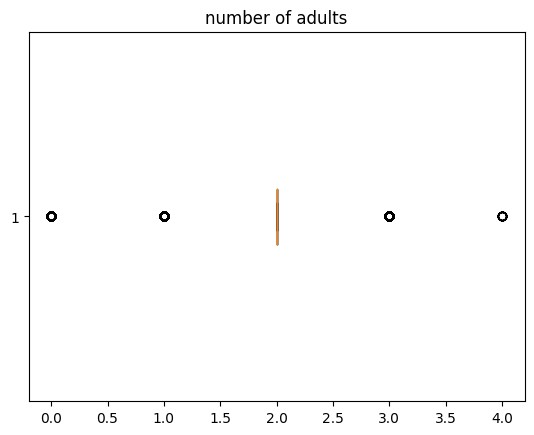

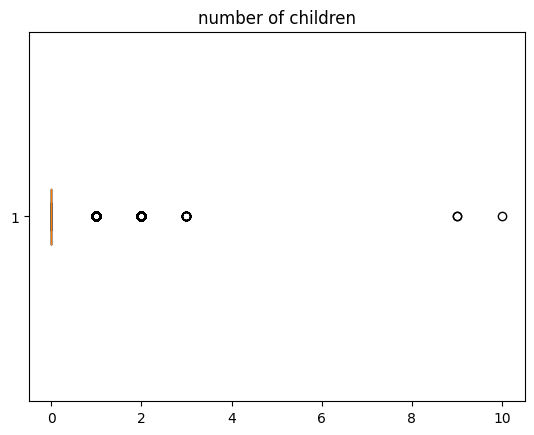

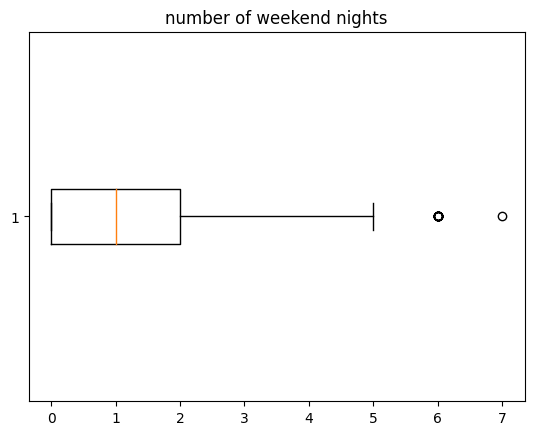

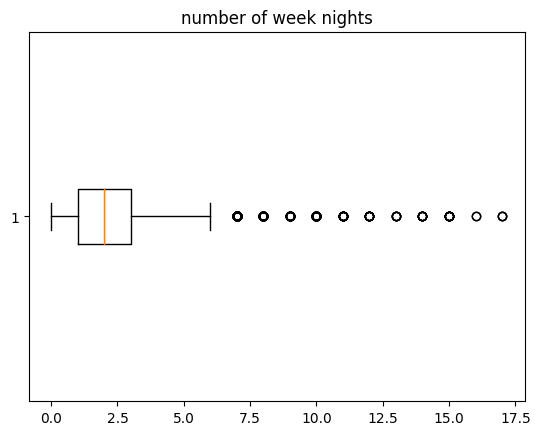

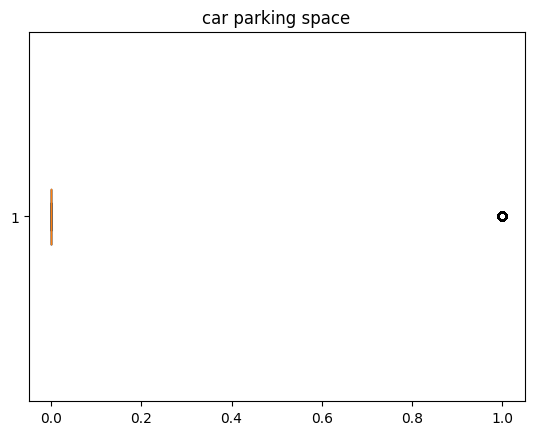

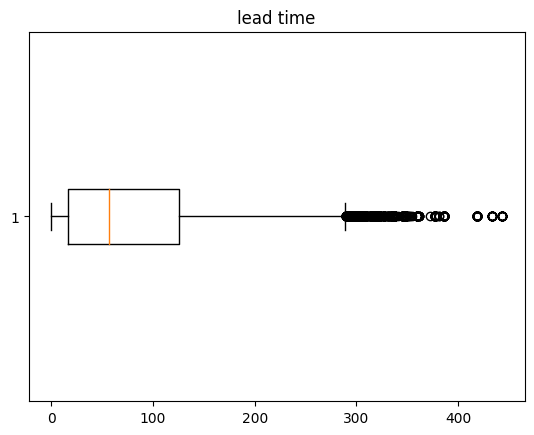

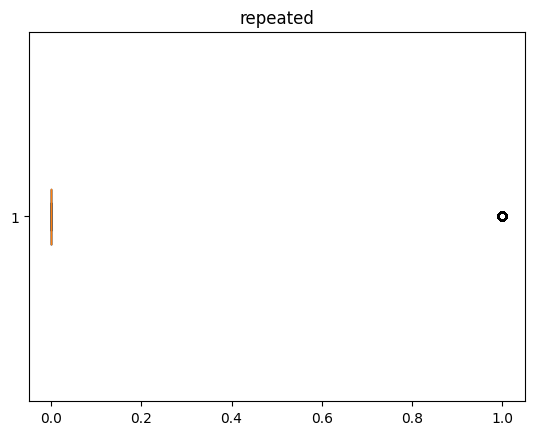

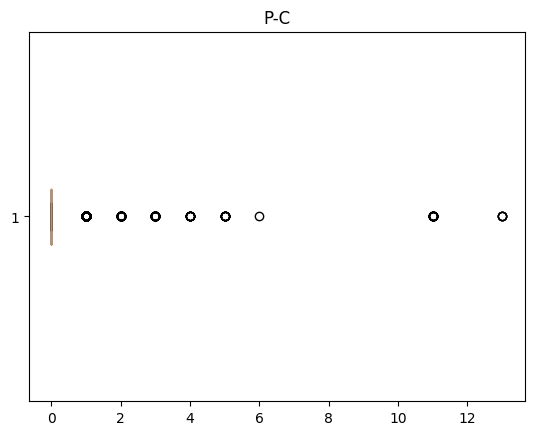

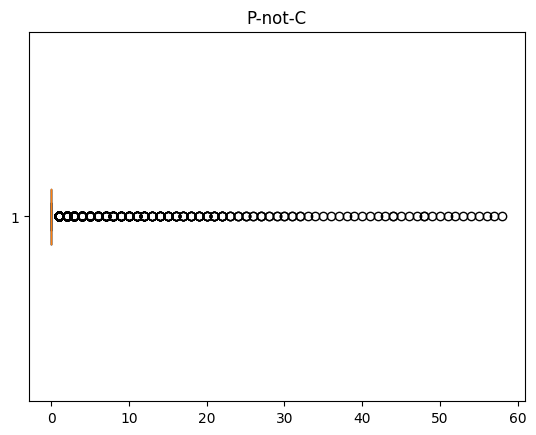

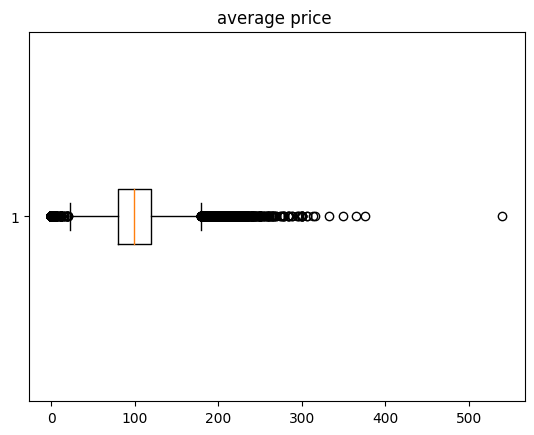

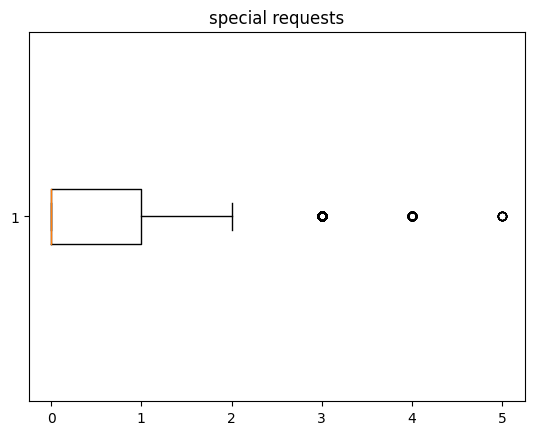

In [ ]:
for col in Numerical_Headings:
  plt.boxplot(df[col], vert=False)
  plt.title(col)
  plt.show()

### Eliminating the outliers

In [ ]:
for col in Numerical_Headings:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

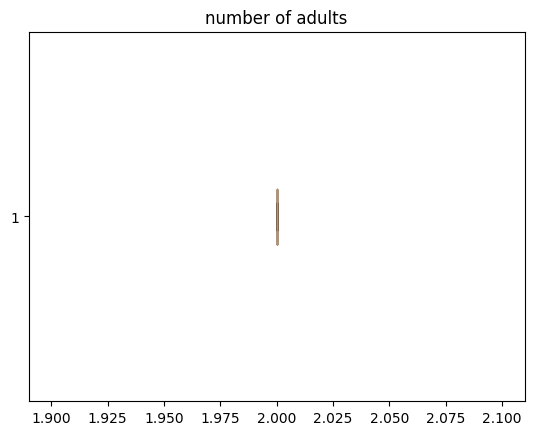

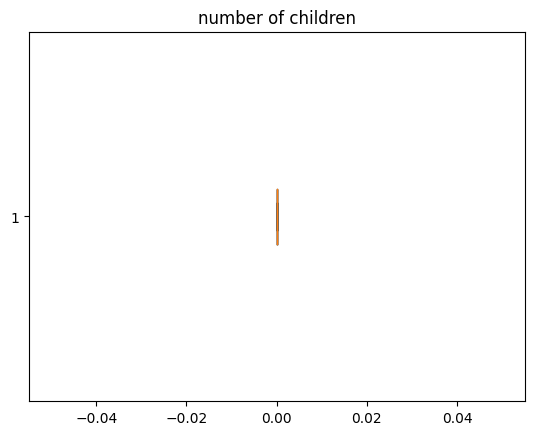

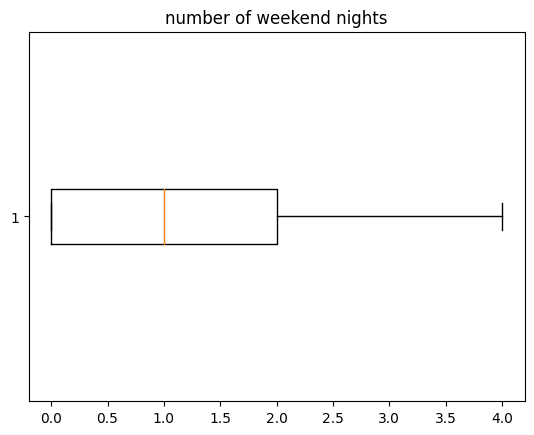

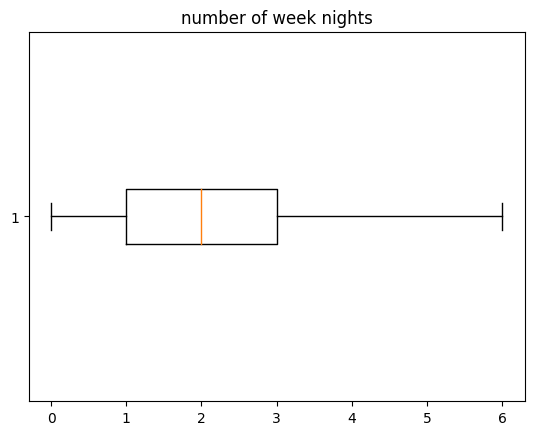

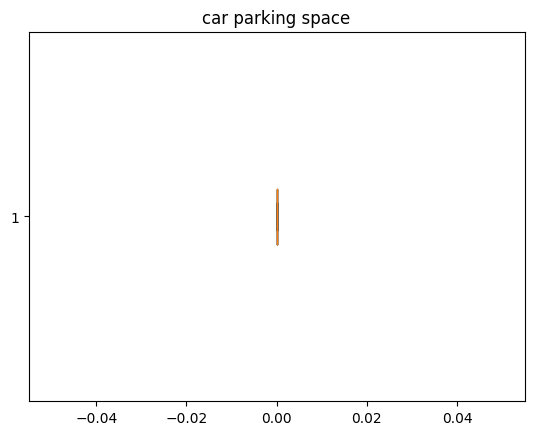

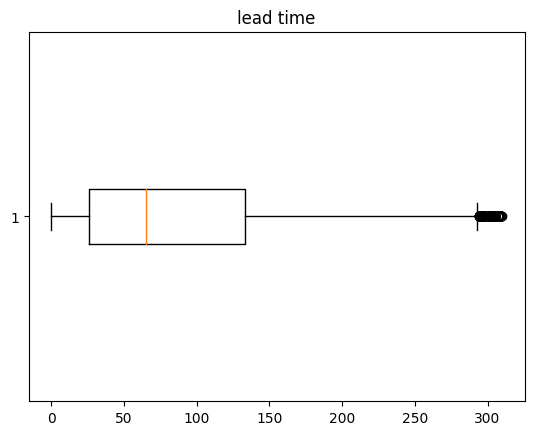

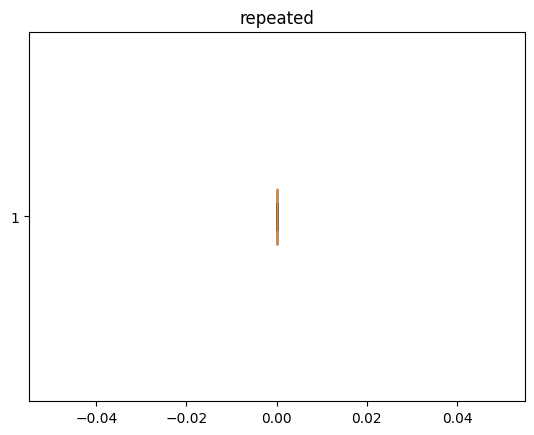

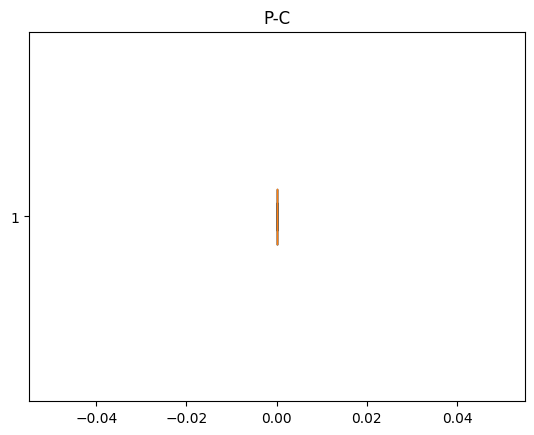

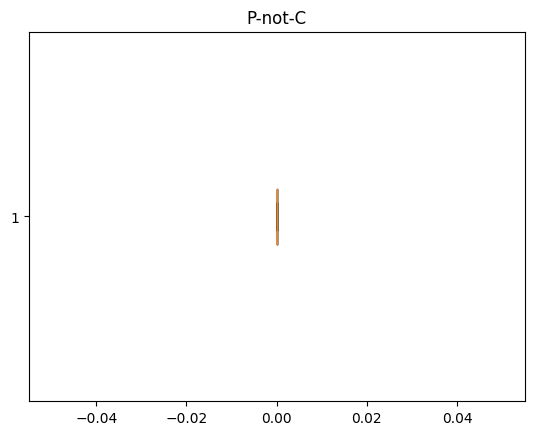

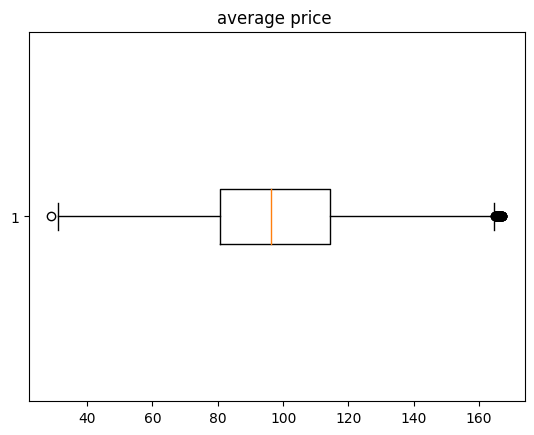

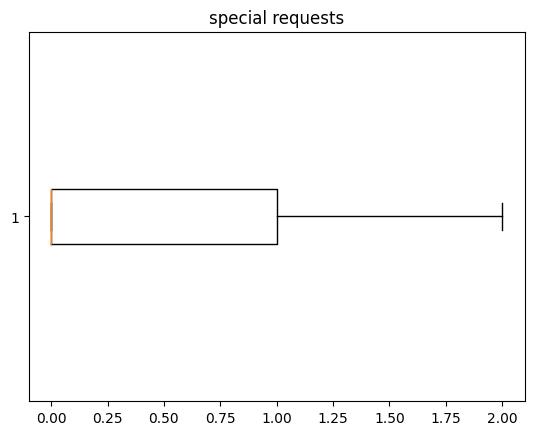

In [ ]:
for col in Numerical_Headings:
  plt.boxplot(df[col], vert=False)
  plt.title(col)
  plt.show()

### Converting Values Stings into Binary Values
Not_Canceled -> 1

Canceled -> 0

In [ ]:
df['booking status'] = df['booking status'].replace("Not_Canceled",1)
df['booking status'] = df['booking status'].replace("Canceled",0)

df['market segment type'] = df['market segment type'].replace("Complementary",4)
df['market segment type'] = df['market segment type'].replace("Aviation",3)
df['market segment type'] = df['market segment type'].replace("Corporate",2)
df['market segment type'] = df['market segment type'].replace("Online",1)
df['market segment type'] = df['market segment type'].replace("Offline",0)

df['type of meal'] = df['type of meal'].replace('Meal Plan 3', 3)
df['type of meal'] = df['type of meal'].replace('Meal Plan 2', 2)
df['type of meal'] = df['type of meal'].replace('Meal Plan 1', 1)
df['type of meal'] = df['type of meal'].replace('Not Selected', 0)

df['room type'] = df['room type'].replace('Room_Type 7', 6)
df['room type'] = df['room type'].replace('Room_Type 6', 5)
df['room type'] = df['room type'].replace('Room_Type 5', 4)
df['room type'] = df['room type'].replace('Room_Type 4', 3)
df['room type'] = df['room type'].replace('Room_Type 3', 2)
df['room type'] = df['room type'].replace('Room_Type 2', 1)
df['room type'] = df['room type'].replace('Room_Type 1', 0)

<ipython-input-15-90ed3512c5d9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['booking status'] = df['booking status'].replace("Canceled",0)
<ipython-input-15-90ed3512c5d9>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['market segment type'] = df['market segment type'].replace("Offline",0)
<ipython-input-15-90ed3512c5d9>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

In [ ]:
df['Total Guests'] = df['number of adults'] + df['number of children']
df['Total Number of Nights'] = df['number of week nights'] + df['number of weekend nights']

In [ ]:
df = df.drop(['number of adults','number of children'], axis=1)
df = df.drop(['Booking_ID'], axis=1)
df = df.drop(['date of reservation'], axis=1)
df = df.drop(['number of week nights'], axis=1)
df = df.drop(['number of weekend nights'], axis=1)
df = df.drop(['special requests'], axis=1)

In [ ]:
df = df.drop(['P-C', 'P-not-C'], axis=1)

In [ ]:
df.head()

type of meal  car parking space  room type  lead time  \
12             0                  0          0         30   
14             1                  0          0         47   
15             2                  0          0        256   
17             0                  0          0          1   
18             1                  0          0         99   

    market segment type  repeated  average price   booking status  \
12                    1         0            88.0               0   
14                    1         0            94.5               1   
15                    1         0           115.0               0   
17                    1         0            96.0               1   
18                    1         0            65.0               0   

    Total Guests  Total Number of Nights  
12             2                       3  
14             2                       2  
15             2                       2  
17             2                       4  
18             2                       4

In [ ]:
df.iloc[:, [8, 9, 0, 1, 2, 3, 4, 5, 6, 7]]

Total Guests  Total Number of Nights  type of meal  car parking space  \
12                2                       3             0                  0   
14                2                       2             1                  0   
15                2                       2             2                  0   
17                2                       4             0                  0   
18                2                       4             1                  0   
...             ...                     ...           ...                ...   
36276             2                       5             0                  0   
36278             2                       2             1                  0   
36279             2                       2             0                  0   
36281             2                       4             1                  0   
36282             2                       4             1                  0   

       room type  lead time  market segment type  repeated  average price   \
12             0         30                    1         0           88.00   
14             0         47                    1         0           94.50   
15             0        256                    1         0          115.00   
17             0          1                    1         0           96.00   
18             0         99                    1         0           65.00   
...          ...        ...                  ...       ...             ...   
36276          0          5                    1         0          106.68   
36278          0        211                    1         0          100.00   
36279          0         48                    1         0           94.50   
36281          0         34                    1         0          107.55   
36282          3         83                    1         0          105.61   

       booking status  
12                  0  
14                  1  
15                  0  
17                  1  
18                  0  
...               ...  
36276               1  
36278               0  
36279               0  
36281               1  
36282               1  

[21189 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21189 entries, 12 to 36282
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   type of meal            21189 non-null  int64  
 1   car parking space       21189 non-null  int64  
 2   room type               21189 non-null  int64  
 3   lead time               21189 non-null  int64  
 4   market segment type     21189 non-null  int64  
 5   repeated                21189 non-null  int64  
 6   average price           21189 non-null  float64
 7   booking status          21189 non-null  int64  
 8   Total Guests            21189 non-null  int64  
 9   Total Number of Nights  21189 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.8 MB


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('booking status', axis=1), df['booking status'], test_size=0.2, random_state=42)

In [ ]:
Greatest_Accuracy = 0
Number_of_Neighbors_at_Greatest_Accuracy = 1
for i in range(1, 20):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    if accuracy_score(y_test, y_pred) > Greatest_Accuracy:
        Greatest_Accuracy = accuracy_score(y_test, y_pred)
        Number_of_Neighbors_at_Greatest_Accuracy = i

print(f"Number of neighbors at greatest accuracy: {Number_of_Neighbors_at_Greatest_Accuracy}")

Number of neighbors at greatest accuracy: 7


In [ ]:
Model = KNeighborsClassifier(n_neighbors=7)
Model.fit(x_train, y_train)
y_pred_train = Model.predict(x_train)
print(f"accuracy_score = {round(accuracy_score(y_train, y_pred_train)*100, 0)}%")

accuracy_score = 83.0%


In [ ]:
y_pred = Model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"accuracy_score = {round(accuracy_score(y_test, y_pred)*100, 0)}%")

              precision    recall  f1-score   support

           0       0.76      0.60      0.67      1490
           1       0.81      0.89      0.85      2748

    accuracy                           0.79      4238
   macro avg       0.78      0.75      0.76      4238
weighted avg       0.79      0.79      0.79      4238

[[ 900  590]
 [ 289 2459]]
accuracy_score = 79.0%


In [ ]:
'''from sklearn.svm import SVC
SVM_Classifier = SVC(kernel='linear')
SVM_Classifier.fit(x_train, y_train)'''

In [ ]:
'''y_pred_svm = SVM_Classifier.predict(x_test)
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(f"accuracy_score = {round(accuracy_score(y_test, y_pred_svm)*100, 0)}%")'''


In [ ]:
joblib_file = "model.pkl"  # Filename for the model
joblib.dump(Model, joblib_file)

['model.pkl']